In [1]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)
print(test_targets)


(404, 13)
(102, 13)
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [3]:
def build_model():
    model=Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [35]:
num_epochs=[100,200,300,400]
k_list=[2,3,4]

training on 100 epochs, k=2
processing fold # 0
processing fold # 1
2.854235291481018

training on 100 epochs, k=3
processing fold # 0
processing fold # 1
processing fold # 2
2.5311888058980307

training on 100 epochs, k=4
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.3454349637031555

training on 200 epochs, k=2
processing fold # 0
processing fold # 1
2.8456660509109497

training on 200 epochs, k=3
processing fold # 0
processing fold # 1
processing fold # 2
2.6594372590382895

training on 200 epochs, k=4
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.555322289466858

training on 300 epochs, k=2
processing fold # 0
processing fold # 1
2.9554057121276855

training on 300 epochs, k=3
processing fold # 0
processing fold # 1
processing fold # 2
2.7512358029683432

training on 300 epochs, k=4
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.5640674233436584

training on 400 epochs, k=2
pr

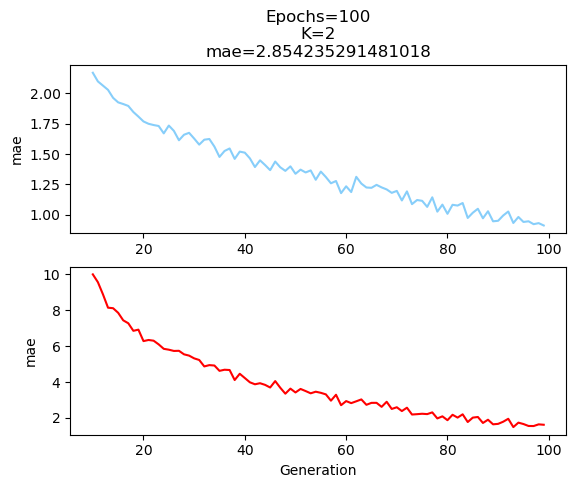

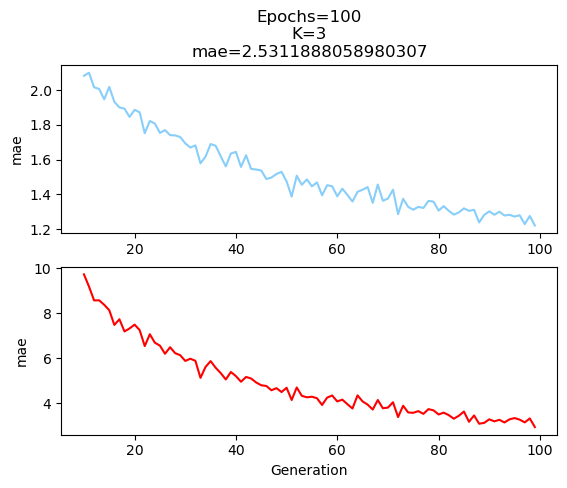

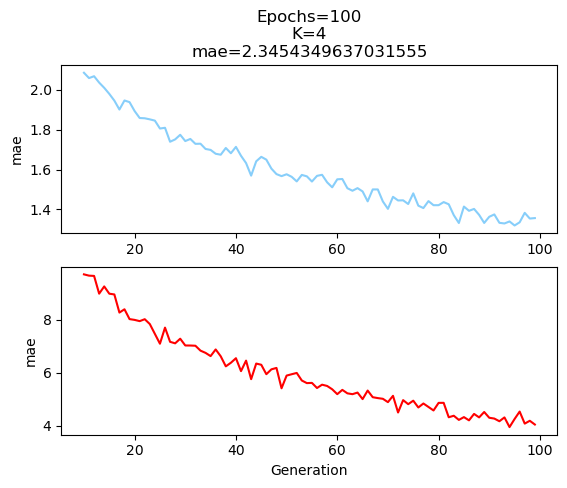

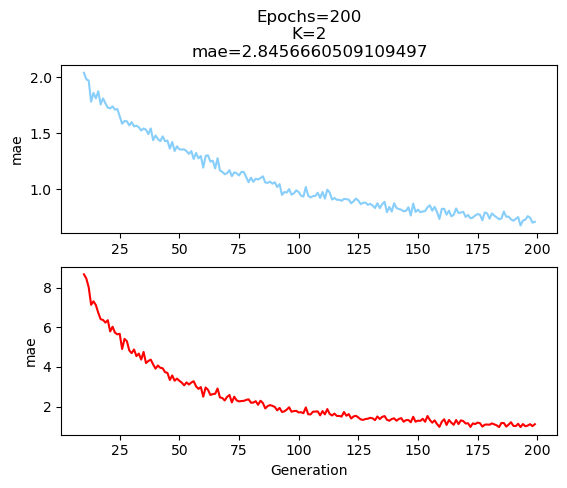

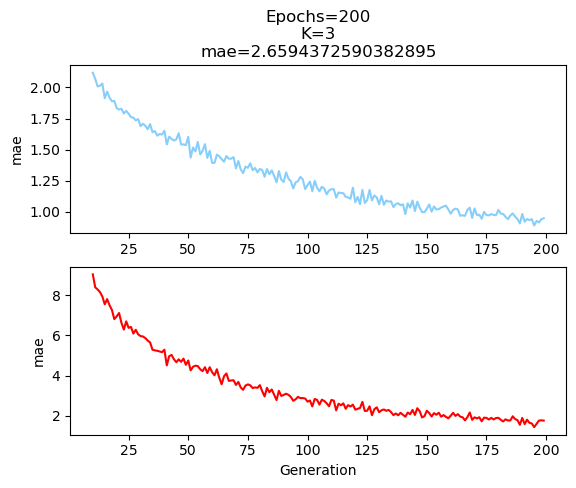

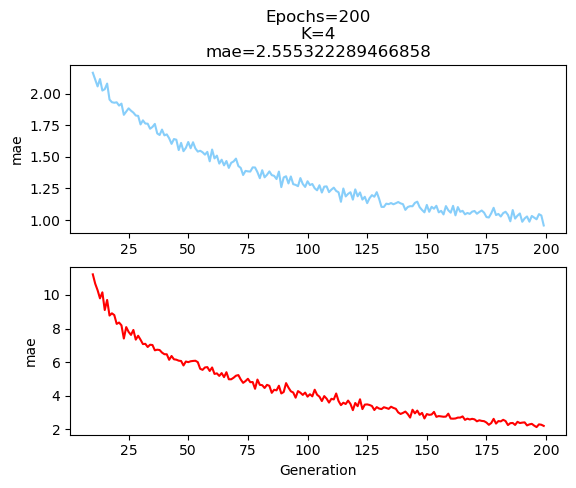

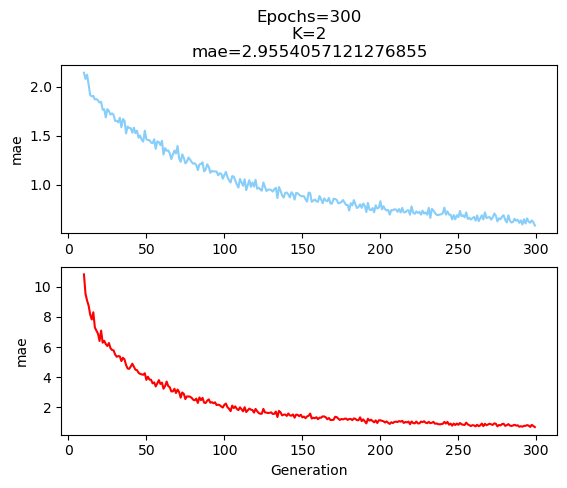

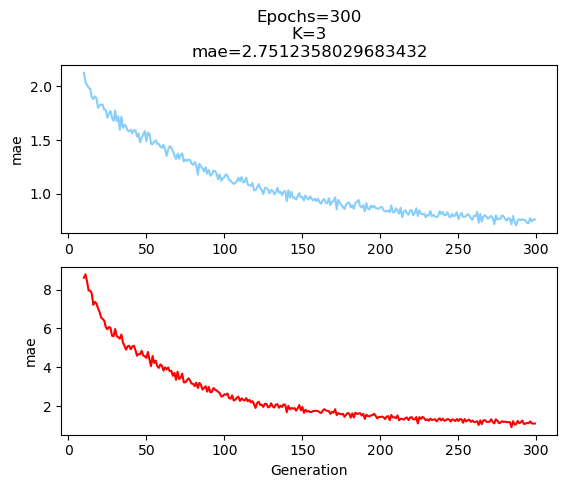

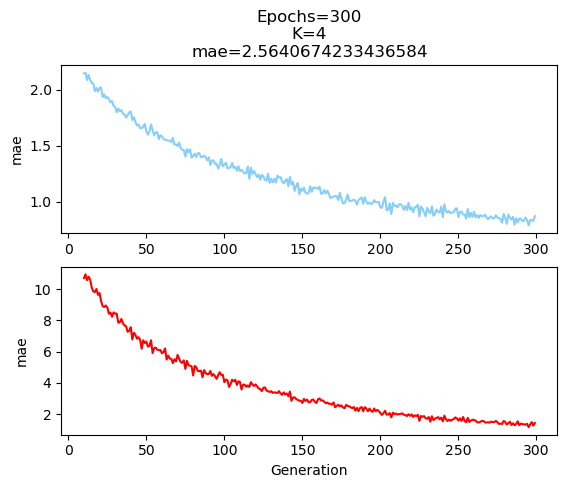

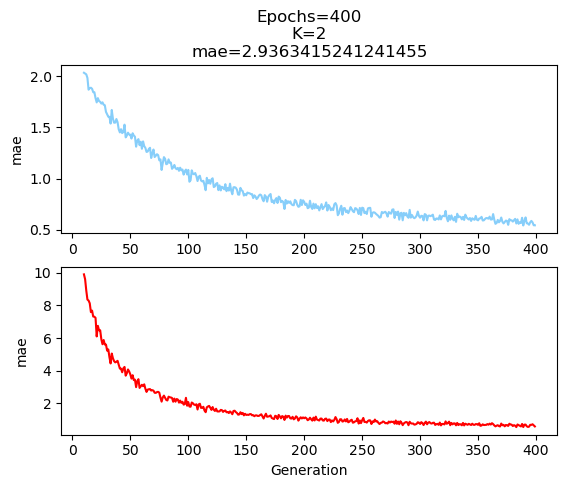

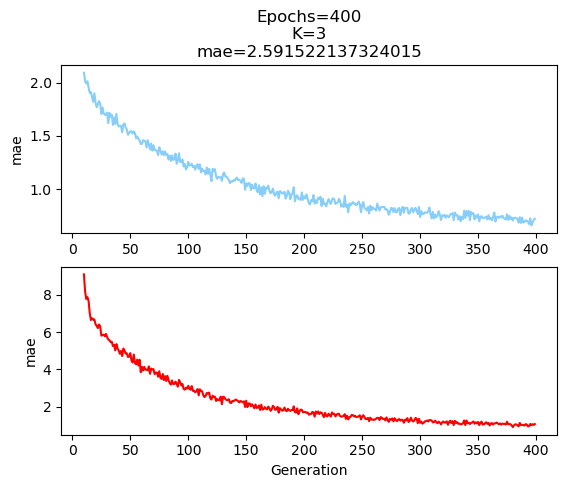

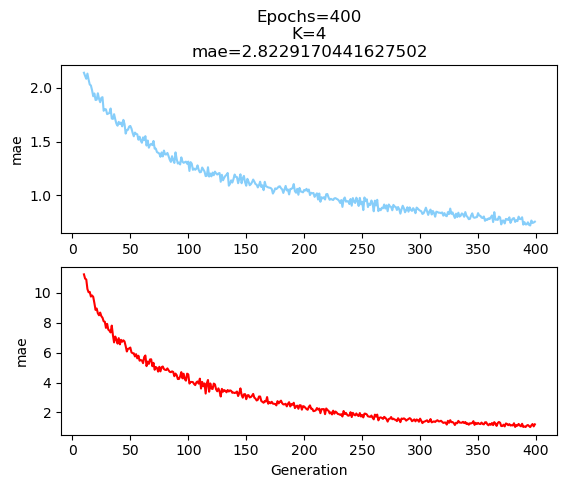

In [36]:
history_list=[]

for m in range(len(num_epochs)):
    for n in range(len(k_list)):
        fig, ax = plt.subplots(nrows=2, ncols=1)
        ax[0].set_ylabel("mae");
        ax[1].set_xlabel("Generation");
        ax[1].set_ylabel("mae");

        print("="*20)
        print(f"training on {num_epochs[m]} epochs, k={k_list[n]}")
        print("="*20)
        
        k = k_list[n]
        num_val_samples = len(train_data) // k  
        all_scores = []
        for i in range(k):
            print('processing fold #', i)
            val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
            val_targets = train_targets[i * num_val_samples: (i + 1) *num_val_samples]
            partial_train_data = np.concatenate([train_data[:i *num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
            partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) *num_val_samples:]], axis=0)
            model = build_model()
            history=model.fit(partial_train_data, partial_train_targets,epochs=num_epochs[m], batch_size=1, verbose=0)
            val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
            all_scores.append(val_mae)
        print(np.mean(all_scores))
        history_list.append(history)
        

        ax[0].plot([i for i in range(len(history.history["mae"]))][10::], history.history["mae"][10::], color = 'lightskyblue')   
        ax[1].plot([i for i in range(len(history.history["loss"]))][10::], history.history["loss"][10::], color = 'red') 
        ax[0].set_title(f"Epochs={num_epochs[m]}\nK={k_list[n]}\nmae={np.mean(all_scores)}")
        print()
plt.show()

По графикам видно, что при увеличении количества эпох точность повышается, при этом при 400 эпохах точность не становится максимально, поэтому для нахождения точки переобучения потребуется построить график для большего числа эпох.

Также для данной модели можно сделать вывод, что оптимальное количество К-блоков будет равняться 4, так как при этом значение точность обучения наилучшая.

In [44]:
num_epochs=4000
k_list=2
print("="*20)
print(f"training on {num_epochs} epochs, k={k_list}")
print("="*20)

k = k_list
num_val_samples = len(train_data) // k  
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) *num_val_samples]
    partial_train_data = np.concatenate([train_data[:i *num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) *num_val_samples:]], axis=0)
    model = build_model()
    history=model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(np.mean(all_scores))
print()


training on 4000 epochs, k=2
processing fold # 0
processing fold # 1
2.882515072822571



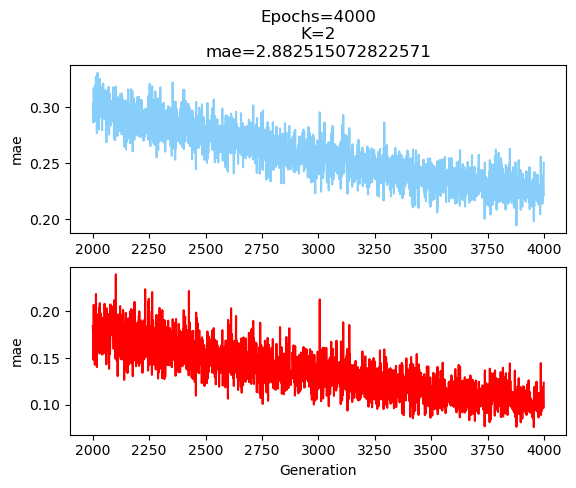

In [54]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("mae");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("mae");
ax[0].plot([i for i in range(len(history.history["mae"]))][2000::], history.history["mae"][2000::], color = 'lightskyblue')   
ax[1].plot([i for i in range(len(history.history["loss"]))][2000::], history.history["loss"][2000::], color = 'red') 
ax[0].set_title(f"Epochs={num_epochs}\nK={k_list}\nmae={np.mean(all_scores)}")
plt.show()

На данном графике мы видим, что точка переобучения находится на 3750 эпохе, дальнейшее обучение модели не приводит к увеличению точности, а также наблюдается незначительный регресс модели, что свидетельствует о наличии переобучения.

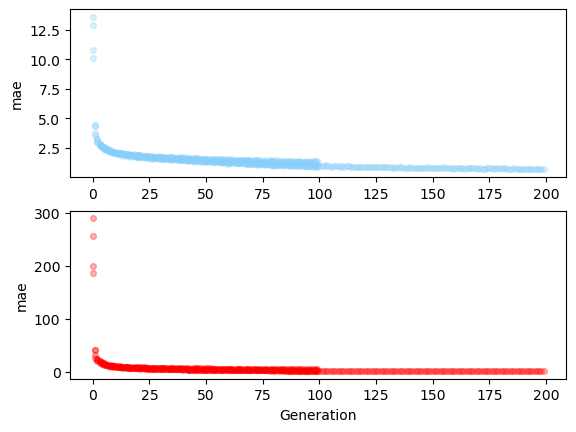

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("mae");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("mae");
for i in range(len(num_epochs)):
    ax[0].scatter([i for i in range(len(history_list[i].history["mae"]))], history_list[i].history["mae"], alpha=0.3, marker = '.',s=70, color = 'lightskyblue')           
    ax[1].scatter([i for i in range(len(history_list[i].history["loss"]))], history_list[i].history["loss"], alpha=0.3, marker = '.',s=70, color = 'red')
plt.show()

Алгоритмы регрессии и классификации различаются по следующим параметрам:

Алгоритмы регрессии стремятся предсказать непрерывную величину, а алгоритмы классификации стремятся предсказать метку класса.

Классификация - это предсказание метки или категории. Алгоритм классификации классифицирует требуемый набор данных в одну из двух или более меток, алгоритм, который работает с двумя классами или категориями, известен как двоичный классификатор, и, если имеется более двух классов, его можно назвать алгоритмом классификации нескольких классов.

Регрессия - это поиск оптимальной функции для определения данных о непрерывных реальных значениях и прогнозирования этой величины. Регрессия с несколькими переменными в качестве входных данных или функций для обучения алгоритму известна как проблема многомерной регрессии. Если в задаче регрессии входные значения зависят или упорядочены по времени, то это называется проблемой прогнозирования временных рядов.